[]
    Date  Revenue
0   2021  $53,823
1   2020  $31,536
2   2019  $24,578
3   2018  $21,461
4   2017  $11,759
5   2016   $7,000
6   2015   $4,046
7   2014   $3,198
8   2013   $2,013
9   2012     $413
10  2011     $204
11  2010     $117
12  2009     $112
[]
    Date Revenue
0   2024  $5,273
1   2023  $5,927
2   2022  $6,011
3   2021  $5,090
4   2020  $6,466
5   2019  $8,285
6   2018  $8,547
7   2017  $7,965
8   2016  $9,364
9   2015  $9,296
10  2014  $9,040
11  2013  $8,887
12  2012  $9,551
13  2011  $9,474
14  2010  $9,078
15  2009  $8,806


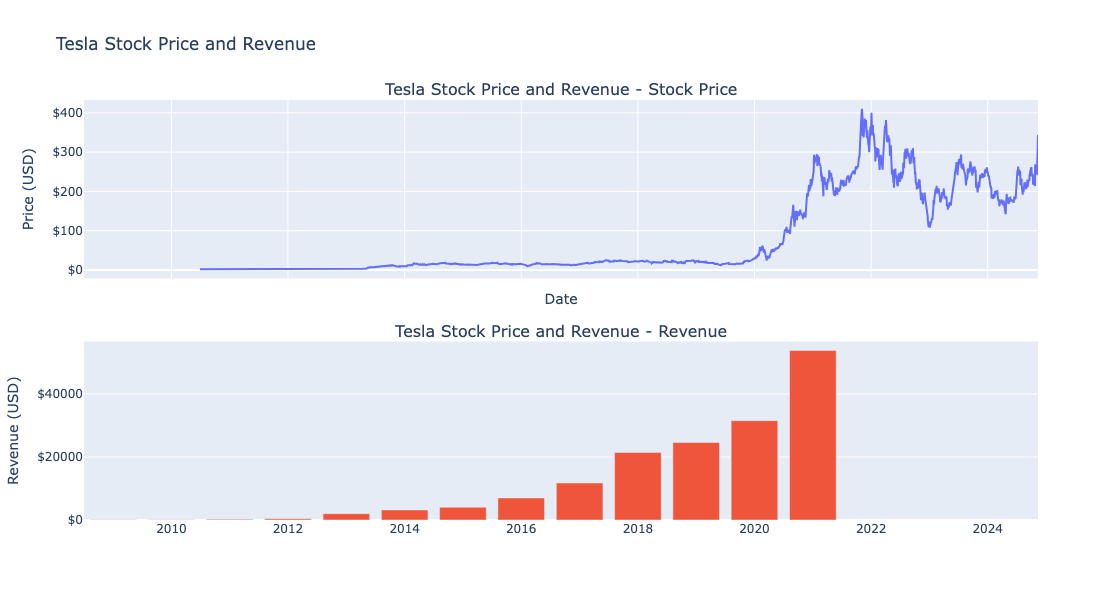

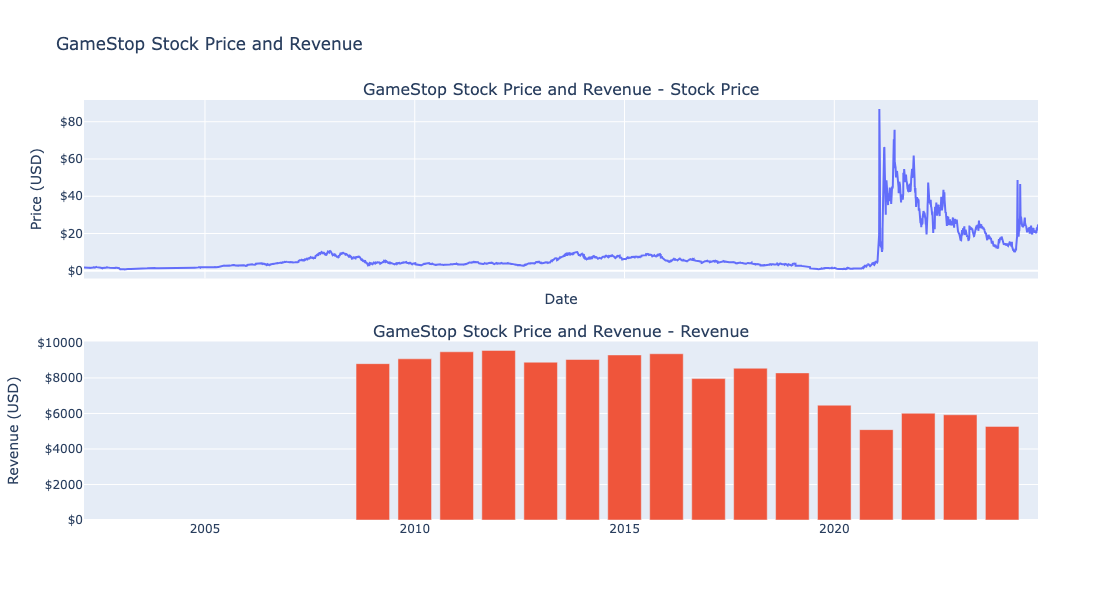

[NbConvertApp] WARNING | pattern 'your_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
 

In [7]:
#Question 1 (START) - Extracting Tesla Stock Data Using yfinance - 2 Points

!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly
!pip install yfinance
!pip install requests

import pandas as pd
import yfinance as yf

tesla_symbol = "TSLA"
tesla_ticker = yf.Ticker(tesla_symbol)
tesla_data = tesla_ticker.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data

#Question 2 (Start) - Extracting Tesla Revenue Data Using Webscraping - 1 Points

from pprint import pprint
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm' 
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')
rev_table = soup.find("table")
rev_data = []
pprint(rev_data)

for row in rev_table.find_all("tr")[1:]:
    columns = row.find_all("td")
    date = columns[0].text.strip()
    revenue = columns[1].text.strip()
    rev_data.append({"Date": date, "Revenue": revenue})
tesla_rev_df = pd.DataFrame(rev_data)
print(tesla_rev_df)

#Question 3 (Start) - Extracting GameStop Stock Data Using yfinance - 2 Points

GameStop_symbol = "GME"
GameStop_ticker = yf.Ticker(GameStop_symbol)
GS_data = GameStop_ticker.history(period="max")
GS_data.reset_index(inplace=True)
GS_data

#Question 4 (Start) - Extracting GameStop Revenue Data Using Webscraping - 1 Points

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36"
}
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, 'html.parser')
rev_table = soup.find("table")
rev_data = []
pprint(rev_data)
for row in rev_table.find_all("tr")[1:]:
    columns = row.find_all("td")
    date = columns[0].text.strip()
    revenue = columns[1].text.strip()
    rev_data.append({"Date": date, "Revenue": revenue})
GS_rev_df = pd.DataFrame(rev_data)
print(GS_rev_df)

#Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

import plotly.graph_objects as go
from plotly.subplots import make_subplots

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36"
}
html_data = requests.get(url, headers=headers).text
def clean_revenue_data(revenue_df):
    revenue_df['Revenue'] = revenue_df['Revenue'].replace(r'[\$,]', '', regex=True).astype(float)
    revenue_df['Date'] = pd.to_datetime(revenue_df['Date'], format='%Y')  # Format dates by year
    return revenue_df

def make_graph(stock_data, revenue_data, title="Stock Price and Revenue Over Time"):
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    
    revenue_data = clean_revenue_data(revenue_data)
    
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        subplot_titles=(f"{title} - Stock Price", f"{title} - Revenue"),
                        vertical_spacing=0.15)
    
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], 
                             mode='lines', name="Stock Price"),
                  row=1, col=1)
    
    fig.add_trace(go.Bar(x=revenue_data['Date'], y=revenue_data['Revenue'],
                         name="Revenue"),
                  row=2, col=1)
    
    fig.update_layout(title=title, xaxis_title="Date", yaxis_title="Price (USD)",
                      yaxis2_title="Revenue (USD)", height=600, showlegend=False)
    
    fig.update_yaxes(tickformat="$", row=1, col=1)
    fig.update_yaxes(tickformat="$", row=2, col=1)
    
    fig.show()
    
#Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

make_graph(tesla_data, tesla_rev_df, title="Tesla Stock Price and Revenue")

#Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

make_graph(GS_data, GS_rev_df, title="GameStop Stock Price and Revenue")

#rendering for
!jupyter nbconvert --to html your_notebook.ipynb
